In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline
from collections import Counter
import re

In [2]:
df  = pd.read_csv('mycsvfile3.csv', names = ['job_id','rating', 'position', 'company', 'job_city', 'job_state_code',
         'sal_low', 'sal_high', 'link','description','hq_city','hq_state_code','size','industry'])
df.sample(5)

,job_id,rating,position,company,job_city,job_state_code,sal_low,sal_high,link,description,hq_city,hq_state_code,size,industry
4169,2895568586,3.2,configuration/data management analyst,Abacus Technology,Lexington,MA,45.0,73.0,https://www.glassdoor.ca/partner/jobListing.ht...,"['reports', 'responsibilities', 'requests', 'd...",ChevyChase,MD,"['1001', '5000']",InformationTechnology
2855,2848553339,3.5,"scientist, zero gravity labs",NaN,NaN,NaN,NaN,NaN,https://www.glassdoor.ca/partner/jobListing.ht...,"['than', 'purchase', 'work', 'mobile', 'dvwork...",Toronto,ON,"['1001', '5000']",BusinessServices
8041,2747444897,3.3,marketing data analyst,"Joomag, Inc.",San Jose,CA,NaN,NaN,https://www.glassdoor.com/partner/jobListing.h...,"['along', 'track', 'direct', 'improve', 'porti...",Sunnyvale,CA,"['51', '200']",InformationTechnology
5903,2865428871,3.6,senior data scientist,NaN,NaN,NaN,NaN,NaN,https://www.glassdoor.ca/partner/jobListing.ht...,"['implementation', 'responsibilities', 'spearh...",Toronto,ON,['10000'],Insurance
2403,2631404074,3.2,sales data insights lead analyst,Oath,Sunnyvale,CA,NaN,NaN,https://www.glassdoor.com/partner/jobListing.h...,"['role', 'teams', 'reach', 'wants', 'key', 'pr...",NewYork,NY,['10000'],Unknown


In [3]:
#csv file treats list objects as strings, getting back the list.
from ast import literal_eval
df['description'] = df['description'].apply(literal_eval)
df = df.drop(['link'], axis =1)
df['sal_mid'] = (df['sal_low']+df['sal_high'])/2

In [4]:
df.columns

Index(['job_id', 'rating', 'position', 'company', 'job_city', 'job_state_code',
       'sal_low', 'sal_high', 'description', 'hq_city', 'hq_state_code',
       'size', 'industry', 'sal_mid'],
      dtype='object')

## Questions:
1. Does rating have anything to do with salary?
    - Done histogram, lineplot, scatterplot
- What are the educational qualifications for the jobs?
    - Done barplot
- Which computational skills are most sought after?
    - Done barplot
- Which companies are hiring most?
    - Done
- Which companies offer highest salaries?
    - Done barplot
- Which cities have most jobs?
    - Done barplot
- Which industry is offering more jobs?
    - Done barplot
- Which industry has highest mean salaries?
    - Done boxplot
- Does company size matter? 
    - Job-wise? Done barplot
    - City-wise? Done NY and CA barplot 
    - Salary-wise? Done boxplot
- Which job positions are mentioned most?
    - Done: Data scientist/Data Engineer, Data Analyst
- Pair job positions and educational qualifications? 
    - Done
- Job education Correlation?
- How does the salary spread look? 
    - City-wise? Done NY and CA barplot 
    - Job-wise? Done
    - Education-wise? Done


### Initial exploration of variables

In [5]:
df.dtypes

job_id              int64
rating            float64
position           object
company            object
job_city           object
job_state_code     object
sal_low           float64
sal_high          float64
description        object
hq_city            object
hq_state_code      object
size               object
industry           object
sal_mid           float64
dtype: object

In [6]:
df.shape # observations, features

(10022, 14)

## Which states have most jobs? 

Text(0.5,0,'Number of jobs')

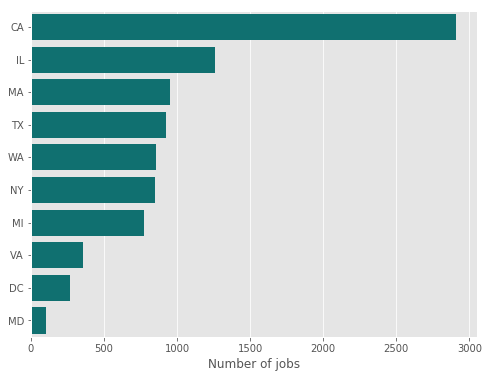

In [7]:
#Sample composition plot. As the sample is not random, can say nothing about population distribution.
plt.rcParams['figure.figsize'] = 8,6
g2  = sns.barplot(df.job_state_code.value_counts().values[:10], df.job_state_code.value_counts().index[:10], color='teal') #top ten sectors
#dummy = g2.set_xticklabels(g2.get_xticklabels(), rotation=90)
plt.xlabel('Number of jobs')

## Head Quarters

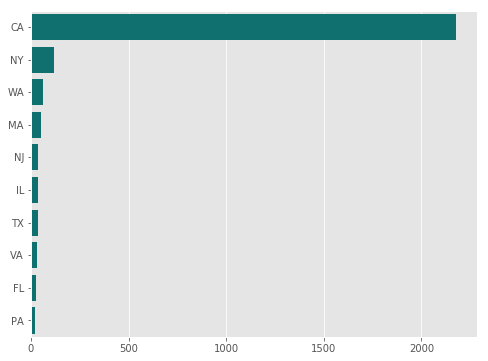

In [8]:
# HQ of companies offering jobs in NY
g2  = sns.barplot(df[df.job_state_code=='NY'].hq_state_code.value_counts().values[:10], 
                  df[df.job_state_code=='NY'].hq_state_code.value_counts().index[:10], color ='teal') #top ten sectors
#dummy = g2.set_xticklabels(g2.get_xticklabels(), rotation=90)

# HQ of companies offering jobs in CA
g2  = sns.barplot(df[df.job_state_code=='CA'].hq_state_code.value_counts().values[:10], 
                  df[df.job_state_code=='CA'].hq_state_code.value_counts().index[:10], color ='teal') #top ten sectors
#dummy = g2.set_xticklabels(g2.get_xticklabels(), rotation=90)

## Mean salary for states

Text(0.5,0,'States')

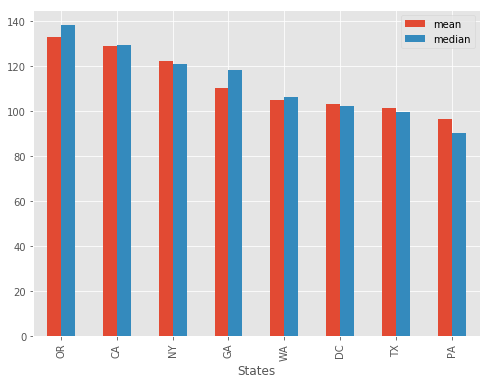

In [9]:
reduced_state_lst = ['CA','NY','OR','WA','DC','TX','GA','PA']
df_reduced = df[df.job_state_code.isin(reduced_state_lst)]

#MEAN SALARY FOR STATES (groupby state)
g2 = df_reduced.groupby('job_state_code').sal_mid.agg([np.mean,np.median]).sort_values(
    'mean', ascending = False).plot(kind='bar')
plt.xlabel('States')

#df.groupby('job_state_code').sal_high.agg([np.mean,np.median]).sort_values('mean', ascending = False).plot(kind='bar')

## Industry

Text(0.5,0,'Number of jobs')

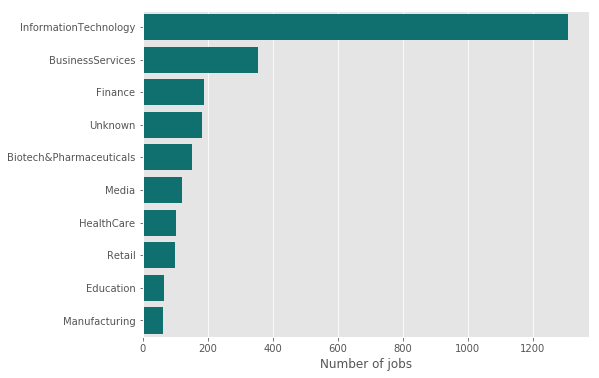

In [10]:
# California: which industry offers most jobs?
g  = sns.barplot(df[df.job_state_code=='CA'].industry.value_counts().values[:10], 
                 df[df.job_state_code=='CA'].industry.value_counts().index[:10], color ='teal') #top ten sectors
#dummy = g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xlabel('Number of jobs')

Text(0.5,0,'Number of jobs')

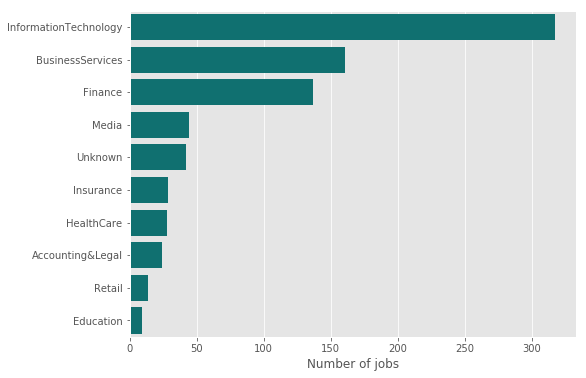

In [11]:
# New York: which industry offers most jobs?
g  = sns.barplot(df[df.job_state_code=='NY'].industry.value_counts().values[:10], 
                 df[df.job_state_code=='NY'].industry.value_counts().index[:10], color ='teal') #top ten sectors
#dummy = g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xlabel('Number of jobs')

## Which industry offers most jobs

In [13]:
dd = df.groupby('industry')['job_id'].count().sort_values(ascending = False)
pd.DataFrame({'count':dd})

,count
industry,
InformationTechnology,3511
BusinessServices,1696
Finance,842
Unknown,650
Biotech&Pharmaceuticals,460
Manufacturing,424
HealthCare,411
Insurance,280
Education,268


Text(0.5,0,'Number of jobs')

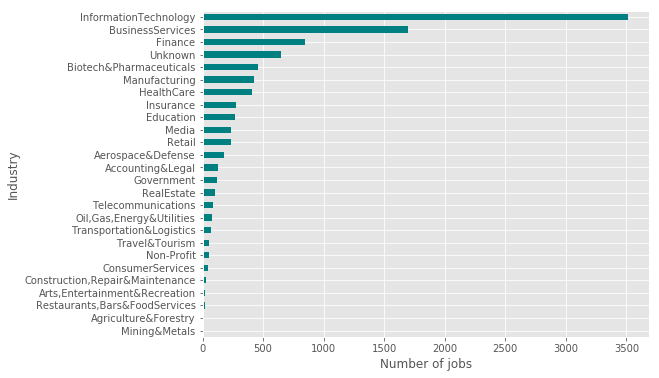

In [168]:
df.groupby('industry')['job_id'].count().sort_values().plot.barh(color = 'teal')
plt.ylabel('Industry')
plt.xlabel('Number of jobs')

In [59]:
#mean salary industry-wise
df.groupby('industry').sal_mid.mean()[:10].sort_values(ascending = False)

industry
ConsumerServices                   121.743243
Accounting&Legal                   118.849462
Agriculture&Forestry               113.681818
Finance                            110.629032
Biotech&Pharmaceuticals            110.221612
Aerospace&Defense                  103.025000
BusinessServices                    94.745957
Construction,Repair&Maintenance     90.825000
Arts,Entertainment&Recreation       87.842105
Education                           78.759524
Name: sal_mid, dtype: float64

Text(0.5,0,'Industry')

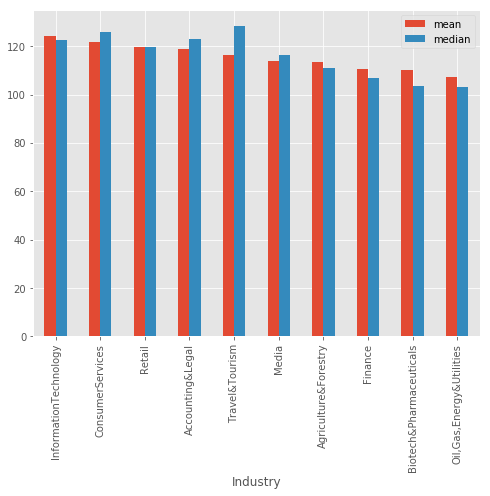

In [172]:
df.groupby('industry').sal_mid.agg([np.mean,np.median]).sort_values('mean', ascending = False)[:10].plot.bar()
plt.xlabel('Industry')

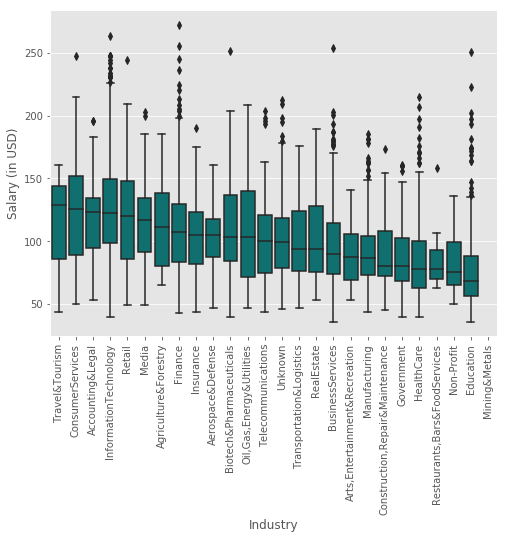

In [61]:
order=df.groupby('industry').median().sort_values(by='sal_mid', ascending = False).index.values
dummy = sns.boxplot(x=df.industry,y=df.sal_mid,data=df, order =order, color ='teal')
g = dummy.set_xticklabels(dummy.get_xticklabels(), rotation=90)
g2 =dummy.set(ylabel='Salary (in USD)', xlabel='Industry')

In [62]:
df.groupby('industry').median().sort_values(by='sal_mid')

,job_id,rating,sal_low,sal_high,sal_mid,DS,DA,DE
industry,,,,,,,,
Education,2.850691e+09,4.10,52.0,84.0,68.00,0.0,0.0,0.0
Non-Profit,2.855202e+09,4.10,59.0,91.0,75.50,0.0,0.0,0.0
"Restaurants,Bars&FoodServices",2.865171e+09,3.80,63.5,93.5,77.75,0.0,0.0,0.0
HealthCare,2.850282e+09,3.70,63.0,93.0,78.00,0.0,0.0,0.0
Government,2.864013e+09,3.30,62.0,97.0,80.00,0.0,0.0,0.0
"Construction,Repair&Maintenance",2.856438e+09,3.50,66.0,95.0,80.50,0.0,0.0,0.0
Manufacturing,2.857588e+09,3.70,72.0,102.5,87.00,0.0,0.0,1.0
"Arts,Entertainment&Recreation",2.835998e+09,3.60,72.0,103.0,87.50,0.0,0.0,0.0
BusinessServices,2.856746e+09,3.70,73.0,109.0,90.00,0.0,0.0,0.0


## Which companies are hiring most? 

Text(0.5,0,'Number of jobs')

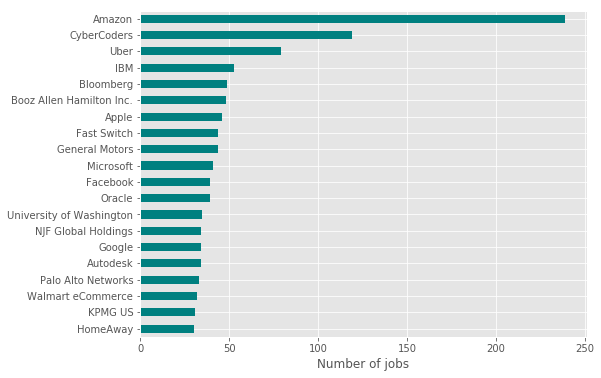

In [173]:
#top 20 companies hiring
df['company'].value_counts().head(20)[::-1].plot.barh(color='teal')
plt.xlabel('Number of jobs')

In [64]:
#top 20 best paying companies?
top_200_company = df['company'].value_counts().head(200) #top 200 companies with most job postings
top_200_company = top_200_company.to_frame().reset_index()
top_200_company.columns = ['company','count']
top_200_company.head()

,company,count
0,Amazon,239
1,CyberCoders,119
2,Uber,79
3,IBM,53
4,Bloomberg,49


In [65]:
top_200_company.shape, df.shape

((200, 2), (10022, 19))

In [66]:
df2 =  pd.merge(df, top_200_company, on='company') #only the top 200 compnaies in terms of job posting
df2.shape

(3340, 20)

Text(0.5,0,'Salary (1000 $)')

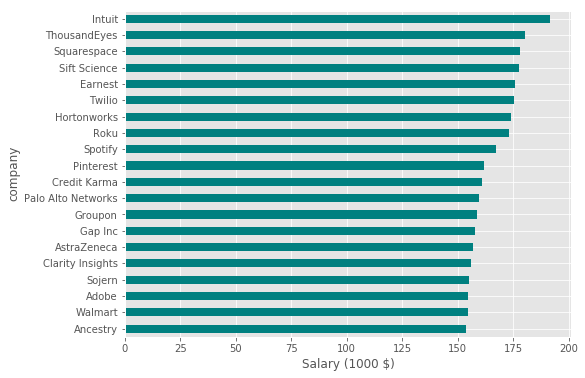

In [174]:
df2.groupby('company')['sal_mid'].mean().sort_values(ascending = False)[:20][::-1].plot.barh(color='teal')
plt.xlabel('Salary (1000 $)')

In [68]:
#df.groupby('industry').sal_high.agg([np.mean,np.median]).sort_values('mean', ascending = False)[:10].plot(kind='bar')

## Company size 

[1 to 50, 10000+, 5001 to 10000, 501 to 1000, 51 to 200, 201 to 500, 1001 to 5000, none]
Categories (8, object): [none < 1 to 50 < 51 to 200 < 201 to 500 < 501 to 1000 < 1001 to 5000 < 5001 to 10000 < 10000+]
9936 10022


/Users/aungshumaan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


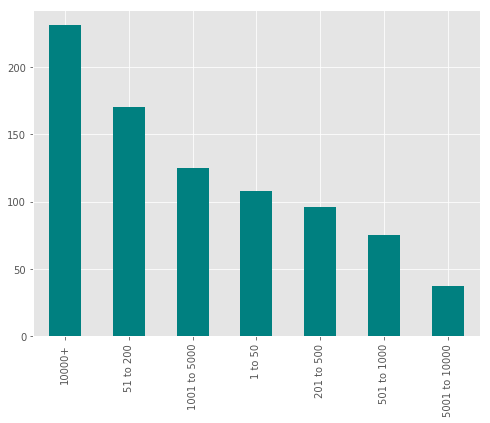

In [115]:
print(df['size'].unique()) 
len(df['size'].unique())
df['size'] = df['size'].astype('category')
df['size'].dtypes
df['size'].cat.categories

df['size'] = df['size'].cat.rename_categories({
    "['1', '50']": '1 to 50',
    "['10000']": '10000+',
    "['1001', '5000']": '1001 to 5000',
    "['201', '500']": '201 to 500',
    "['5001', '10000']": '5001 to 10000',
    "['501', '1000']": '501 to 1000',
    "['51', '200']": '51 to 200',
    "[]": 'none',
                }) 
#s.cat.rename_categories({1: 'x', 2: 'y', 3: 'z'})
df['size'].value_counts()

from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['none','1 to 50', '51 to 200','201 to 500', 
       '501 to 1000', '1001 to 5000', '5001 to 10000','10000+' ], ordered=True)
df['size'] = df['size'].astype(cat_type)
df['size'].head()
df['size'].value_counts()
#remove entries with no size information
df_size = df[df['size'] != 'none']
print(len(df_size),len(df))

df_size['size'] = df_size['size'].cat.remove_unused_categories()
#df_size['size'] = df_size['size'].cat.remove_categories('[]')
df_size['size'].cat.categories
df_size['size'].value_counts()
df_size[df_size.job_state_code=='NY']['size'].value_counts().plot(kind ='bar', color ='teal')



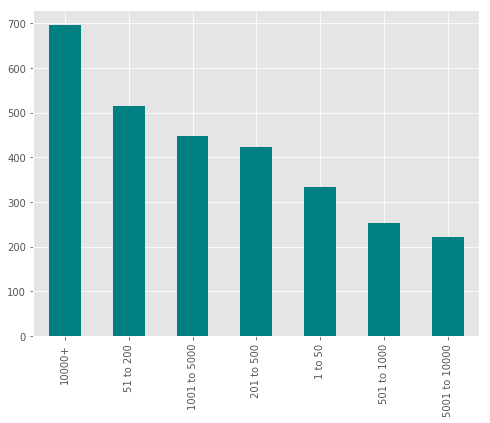

In [118]:
df_size[df_size.job_state_code=='CA']['size'].value_counts().plot(kind ='bar', color ='teal')
#labels = ['1000','51-200','1001-5000','b','c','d']
#plt.xticks(df_size, labels, rotation='horizontal')


## Does company size matter when it comes to salary?

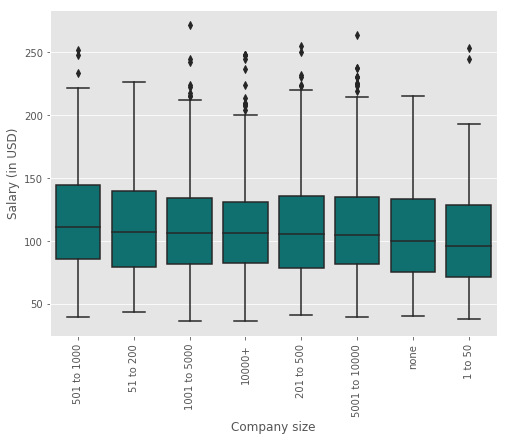

In [117]:
order=df.groupby('size').median().sort_values(by='sal_mid', ascending = False).index.values
dummy = sns.boxplot(x=df['size'],y=df.sal_mid,data=df, order =order, color ='teal')
g = dummy.set_xticklabels(dummy.get_xticklabels(), rotation=90)
g2 =dummy.set(ylabel='Salary (in USD)', xlabel='Company size')

### Does rating have any meaning?

Text(0.5,1,'Histogram of Rating')

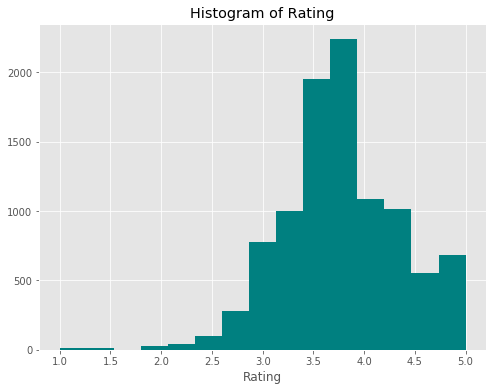

In [139]:
labels = ["{0} - {1}".format(i-0.5, i + 0.5) for i in range(1, 6)]
bins = [i-0.5 for i in range(1,7)]
labels ,bins      
df['ratingGroup'] = pd.cut(df.rating, [0.5,1.5,2.5,3.5,4.5,5.5], right=False, 
                           labels =labels)

df[['rating','ratingGroup']].head(10)
df.ratingGroup.value_counts()
dummy  = plt.hist(df['rating'].dropna(), bins =15, color ='teal')
plt.xlabel('Rating')
plt.ylabel('')
plt.title('Histogram of Rating')

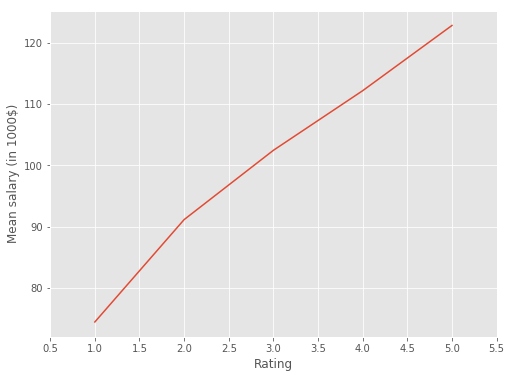

In [175]:
df.groupby('ratingGroup')['sal_mid'].mean()
df.groupby('ratingGroup')['sal_mid'].mean().reset_index()
df.groupby('ratingGroup')['sal_mid'].mean().plot()
plt.ylabel('Mean salary (in 1000$)')
plt.xlabel('Rating')
locs, labels = plt.xticks()
dum = plt.xticks(locs, np.linspace(0.5,5.5,11))



Text(0,0.5,'salary (in 1000$)')

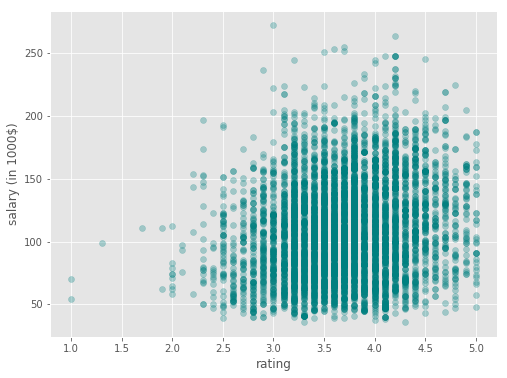

In [141]:
##
plt.scatter(df['rating'],df['sal_mid'], color = 'teal',alpha =0.3)
plt.xlabel('rating')
plt.ylabel('salary (in 1000$)')

## Job Category/ Position

4.55996807024546
3802 2327 3004


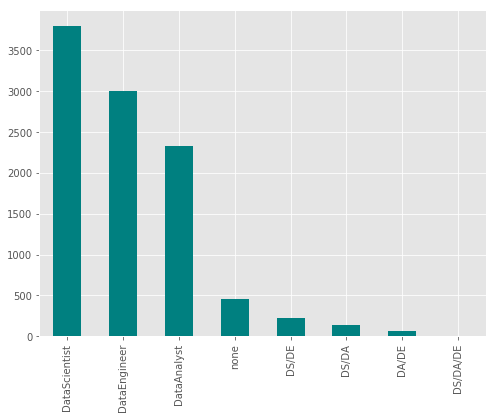

In [146]:

job_dict = {}
job_dict ={'DS':"(scientist|science)",
                'DE' : "(engineer|developer)",
                'DA':"analyst"         
          }
df['DS'] = df['position'].apply(lambda x: len(re.findall(job_dict['DS'],x))>0 )
df['DA'] = df['position'].apply(lambda x: len(re.findall(job_dict['DA'],x))>0 )
df['DE'] = df['position'].apply(lambda x: len(re.findall(job_dict['DE'],x))>0 )
df.shape[0]
df.DS.sum(), df.DA.sum(), df.DE.sum()
df[df.DS].shape[0], df[df.DA].shape[0], df[df.DE].shape[0]

#job title does not include analyst, scientist or engineer
df_none  = df[np.logical_and(np.logical_and(df.DS ==False, df.DA ==False), df.DE ==False)]

df_DS_only = df[np.logical_and(np.logical_and(df.DE ==False, df.DA ==False), df.DS ==True)]
df_DA_only = df[np.logical_and(np.logical_and(df.DS ==False, df.DE ==False), df.DA ==True)]
df_DE_only = df[np.logical_and(np.logical_and(df.DS ==False, df.DA ==False), df.DE ==True)]
print(df_none.shape[0]/df.shape[0] *100)
print(df_DS_only.shape[0], df_DA_only.shape[0], df_DE_only.shape[0])

df_none['position'].head(10)

df['job_code'] = 100*df.DS + 10*df.DE + df.DA
df['job_code'] = df['job_code'].astype('category')
df['job_code'] = df['job_code'].cat.rename_categories({
    100: 'DataScientist',
    10: 'DataEngineer',
    1: 'DataAnalyst',
    0: 'none',
    110:'DS/DE',
    101:'DS/DA',
    11:'DA/DE',
    111:'DS/DA/DE'
                }) 
df['job_code'].value_counts()

df['job_code'].value_counts().plot.bar(color ='teal')


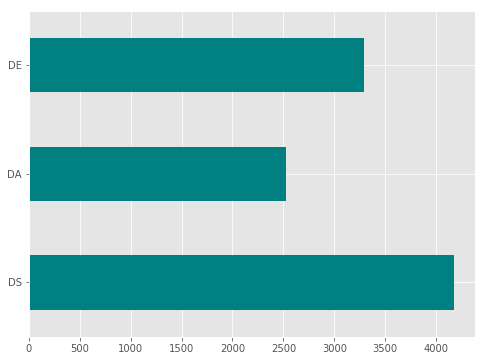

In [147]:
df[['DS','DA','DE']].sum().plot.barh(color ='teal')

## Education

In [148]:
#edus = ['phd','doctorate','doctor','masters','ms','bachelor','bs','bsc','b.sc.','undergrad','undergraduate','associate']
edus = ['bs','b.s.','bsc','b.s.c','b.sc.','ba','b.a.','bachelor','undergrad','undergraduate','associate',
       'ms','m.s.','msc','m.s.c','m.sc.','ma','m.a.','master','masters','graduate',
       'phd','ph.d.','ph.d','advanced','doctoral','doctorate','post-graduate']

edu_dict = {}
for edu in edus:
    print(edu,' : ',tool_freq(edu))
    edu_dict[edu] = tool_freq(edu)

bs  :  477
b.s.  :  65
bsc  :  16
b.s.c  :  0
b.sc.  :  4
ba  :  204
b.a.  :  10
bachelor  :  627
undergrad  :  2
undergraduate  :  60
associate  :  226
ms  :  613
m.s.  :  63
msc  :  15
m.s.c  :  0
m.sc.  :  8
ma  :  260
m.a.  :  2
master  :  461
masters  :  467
graduate  :  184
phd  :  500
ph.d.  :  198
ph.d  :  26
advanced  :  1762
doctoral  :  41
doctorate  :  19
post-graduate  :  0


In [149]:
#new approach using regex
#TEST
s = 'I have a BSc or B.S.c or B.S. or B.S.c. or B.Sc. or BSCA or BA or MS or bs or bsc or b.sc. \
or bachelor or undergrad or undergraduate or associate degree'
re.findall("(?<![A-Z])B\.?S\.?c?(?![A-Z])",s, flags = re.IGNORECASE) #BSc, B.S., B.S.c., B.Sc

df['description'].apply(lambda x: ' '.join(x)).head()

edu_dict_new ={'bachelor':"(?<![a-z])b\.?s\.?c?(?![a-z])|(?<![a-z])b\.?a\.?(?![a-z])|bachelor|undergrad.{0,40} \
degree|associate'?s?.{0,20}degree",
                'mba' : "([\s|-|/]mba[\s|-|/]|[\s|-|/]mbus[\s|-|/]|[\s|-|/]mbs[\s|-|/]|masters? of business)",
                'masters':"(?<![a-z])m\.?s\.?c?(?![a-z])|(?<![a-z])m\.?a\.?(?![a-z])|master'?s|\
        master'?s.{0,40}degree|graduate.{0,40}degree",
                'phd':"ph\.?d|advanced?.{0,40}degree|doctora[te|l]|post-?\s?graduate"
          
          }

df['description'].apply(lambda x: len(re.findall(edu_dict_new['bachelor'],' '.join(x)))>0 ).sum()

edu_dict_new2 = {}
for key in edu_dict_new.keys():
    print(key)
    edu_dict_new2[key] = df['description'].apply(lambda x: len(re.findall(edu_dict_new[key],' '.join(x)))>0 ).sum()
edu_dict_new2

df_edu = pd.DataFrame.from_dict(edu_dict_new2, orient='index')
df_edu.columns = ['frequency']
df_edu.head()

phd
bachelor
mba
masters


,frequency
phd,786
bachelor,1765
mba,47
masters,1389


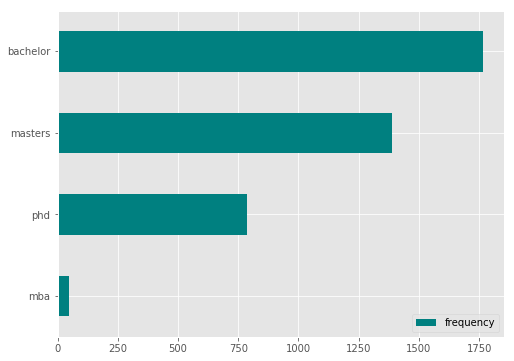

In [150]:
dummy = df_edu.sort_values(by ='frequency').plot.barh( color ='teal')

In [151]:
df['bachelor']  = df['description'].apply(lambda x: len(re.findall(edu_dict_new['bachelor'],' '.join(x)))>0 )
df['masters']  = df['description'].apply(lambda x: len(re.findall(edu_dict_new['masters'],' '.join(x)))>0 )
df['phd']  = df['description'].apply(lambda x: len(re.findall(edu_dict_new['phd'],' '.join(x)))>0 )
df['mba']  = df['description'].apply(lambda x: len(re.findall(edu_dict_new['mba'],' '.join(x)))>0 )

df[df['bachelor']].shape[0], df[df['masters']].shape[0], df[df['phd']].shape[0], df[df['mba']].shape[0] #agrees!

#job title does not include analyst, scientist or engineer
df_edu_none  = df[np.logical_and(np.logical_and(df.bachelor ==False, df.masters ==False), df.phd ==False)]

df_bachelor_only = df[np.logical_and(np.logical_and(df.masters ==False, df.phd ==False), df.bachelor ==True)]
df_masters_only = df[np.logical_and(np.logical_and(df.bachelor ==False, df.phd ==False), df.masters ==True)]
df_phd_only = df[np.logical_and(np.logical_and(df.bachelor ==False, df.masters ==False), df.phd ==True)]
print(df_edu_none.shape[0]/df.shape[0] *100)
print(df_bachelor_only.shape[0], df_masters_only.shape[0], df_phd_only.shape[0])

df.groupby('job_code')['phd','masters','bachelor'].sum().sort_values('phd', ascending =False)

72.09139892237079
1095 451 293


,phd,masters,bachelor
job_code,,,
DataScientist,630.0,739.0,524.0
DataEngineer,73.0,233.0,552.0
none,32.0,59.0,99.0
DS/DE,26.0,41.0,62.0
DataAnalyst,20.0,296.0,485.0
DS/DA,5.0,10.0,29.0
DA/DE,0.0,11.0,14.0
DS/DA/DE,0.0,0.0,0.0


Text(0.5,1,'Data related jobs and educational requirement')

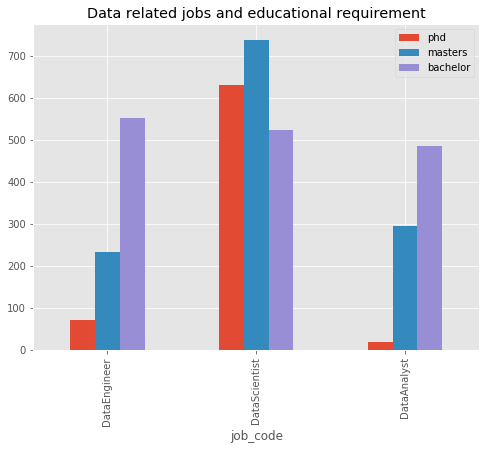

In [152]:
df_jobs = df[df.job_code !='none']
df_jobs.groupby('job_code')['phd','masters','bachelor'].sum().sort_values('bachelor', ascending =False).head(3).plot.bar()
plt.title('Data related jobs and educational requirement')

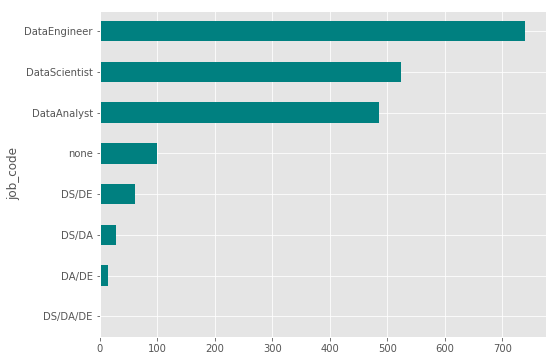

In [153]:
df.groupby('job_code')['phd'].sum().sort_values().plot.barh(color ='teal')
df.groupby('job_code')['masters'].sum().sort_values().plot.barh(color ='teal')
df.groupby('job_code')['bachelor'].sum().sort_values().plot.barh(color ='teal')

In [154]:
df['edu_code'] = 100*df.phd + 10*df.masters + df.bachelor
df['edu_code'] = df['edu_code'].astype('category')
df['edu_code'] = df['edu_code'].cat.rename_categories({
    100: 'PhD',
    10: 'Masters',
    1: 'Bachelor',
    0: 'none',
    110:'PhD/Masters',
    101:'PhD/Bachelor',
    11:'Masters/Bachelor',
    111:'PhD/Masters/Bachelor'
                }) 
df['edu_code'].value_counts()

none                    7225
Bachelor                1095
Masters/Bachelor         465
Masters                  451
PhD                      293
PhD/Masters              288
PhD/Masters/Bachelor     185
PhD/Bachelor              20
Name: edu_code, dtype: int64

Text(0.5,1,'Educational requirement ')

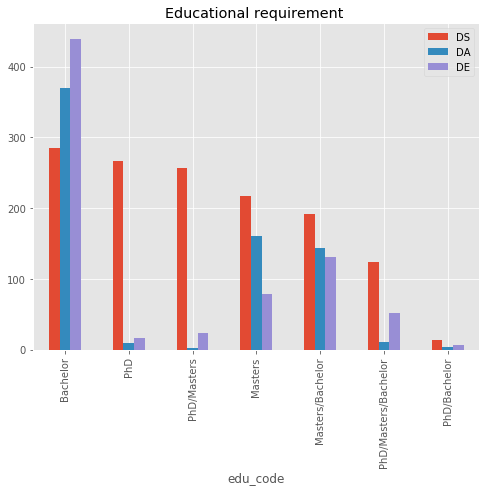

In [155]:
df_edu = df[df.edu_code !='none']
df_edu.groupby('edu_code')['DS','DA','DE'].sum().sort_values('DS',ascending =False).head(7)
df_edu.groupby('edu_code')['DS','DA','DE'].sum().sort_values('DS',ascending =False).head(7).plot.bar()
plt.title('Educational requirement ')

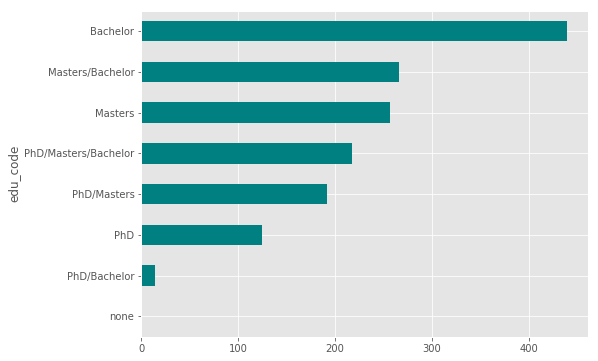

In [156]:
df_edu.groupby('edu_code')['DS'].sum().sort_values().plot.barh(color ='teal')
df_edu.groupby('edu_code')['DA'].sum().sort_values().plot.barh(color ='teal')
df_edu.groupby('edu_code')['DE'].sum().sort_values().plot.barh(color ='teal')

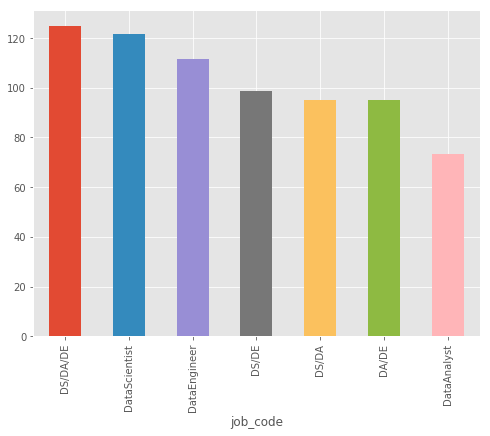

In [159]:
df_jobs.groupby('job_code')['sal_mid'].median().sort_values( ascending =False).head(7).plot.bar()

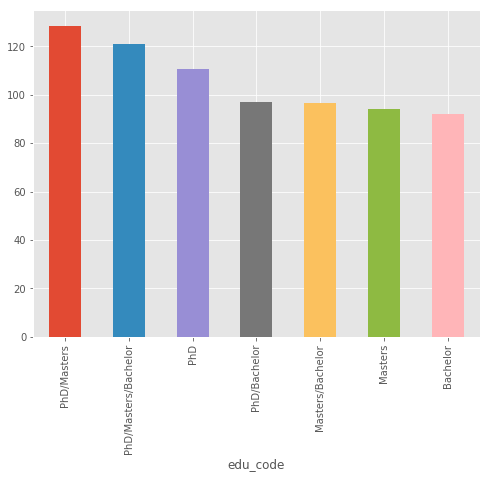

In [160]:
df_edu.groupby('edu_code')['sal_mid'].median().sort_values(ascending =False).head(7).plot.bar()

## Desirable Skill sets

python  :  1484
r  :  1344
java  :  798
c++  :  353
sql  :  1443
excel  :  589
scala  :  318
stata  :  51
sas  :  377
spark  :  651
hadoop  :  689
cloudera  :  17
mongodb  :  107
tableau  :  449
hive  :  275
tensorflow  :  115
django  :  17
aws  :  465
mahout  :  20
matlab  :  206
cassandra  :  107
mapreduce  :  115


Text(0,0.5,'Number of jobs')

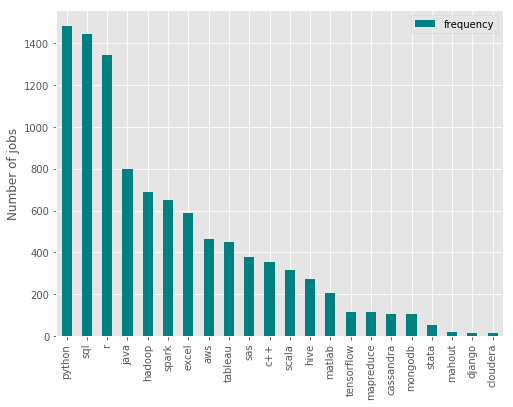

In [177]:
df.description.head()
df['description'].apply(lambda x: "hadoop" in x).head()
df['description'].apply(lambda x: "hadoop" in x).sum()
df['description'].apply(lambda x: "hadoop"  not in x).sum()

def tool_freq(tool):
    return df['description'].apply(lambda x: tool in x).sum()

tools = ['python','r','java','c++','sql','excel','scala','stata','sas','spark','hadoop',
         'cloudera','mongodb','tableau','hive','tensorflow','django','aws','mahout','matlab','cassandra','mapreduce'] #'bokeh','clojure'

skill_dict = {}
for tool in tools:
    print(tool,' : ',tool_freq(tool))
    skill_dict[tool] = tool_freq(tool)
    
skill_dict

df_job = pd.DataFrame.from_dict(skill_dict, orient='index')
df_job.columns = ['frequency']
df_job.head()

dummy = df_job.sort_values(by ='frequency', ascending = False).plot(kind ='bar', color ='teal')
plt.ylabel('Number of jobs')


## Salary histogram

Text(0.5,1,'Histogram of Salary')

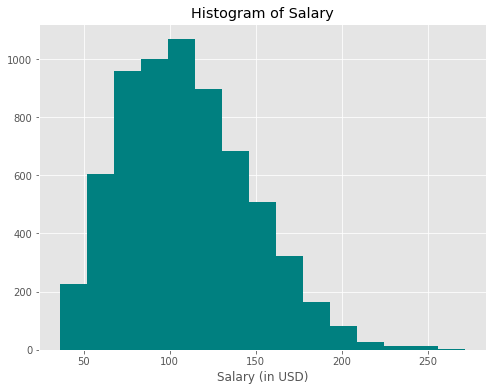

In [158]:
dummy  = plt.hist(df['sal_mid'].dropna(), bins =15, color ='teal')
plt.xlabel('Salary (in USD)')
plt.ylabel('')
plt.title('Histogram of Salary')